In [210]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pprint

In [358]:
TEST_CSV = "/mnt/c/Users/User/Documents/GitHub/Last-Mile-206/datasets/final.csv"

In [359]:
df = pd.read_csv(TEST_CSV)
df.head()

,Unnamed: 0,Unnamed: 0_x,Country,Country Code,Indicator Name,Indicator Code,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 0_y,index,WEO Country Code,ISO,WEO Subject Code,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,gdp_const_1980,gdp_const_1981,gdp_const_1982,gdp_const_1983,gdp_const_1984,gdp_const_1985,gdp_const_1986,gdp_const_1987,gdp_const_1988,gdp_const_1989,gdp_const_1990,gdp_const_1991,gdp_const_1992,gdp_const_1993,gdp_const_1994,gdp_const_1995,gdp_const_1996,gdp_const_1997,gdp_const_1998,gdp_const_1999,gdp_const_2000,gdp_const_2001,gdp_const_2002,gdp_const_2003,gdp_const_2004,gdp_const_2005,gdp_const_2006,gdp_const_2007,gdp_const_2008,gdp_const_2009,gdp_const_2010,gdp_const_2011,gdp_const_2012,gdp_const_2013,gdp_const_2014,gdp_const_2015,gdp_const_2016,gdp_const_2017,gdp_const_2018,gdp_const_2019,gdp_const_2020,gdp_const_2021,gdp_const_Estimates Start After,gdp_curr_1980,gdp_curr_1981,gdp_curr_1982,gdp_curr_1983,gdp_curr_1984,gdp_curr_1985,gdp_curr_1986,gdp_curr_1987,gdp_curr_1988,gdp_curr_1989,gdp_curr_1990,gdp_curr_1991,gdp_curr_1992,gdp_curr_1993,gdp_curr_1994,gdp_curr_1995,gdp_curr_1996,gdp_curr_1997,gdp_curr_1998,gdp_curr_1999,gdp_curr_2000,gdp_curr_2001,gdp_curr_2002,gdp_curr_2003,gdp_curr_2004,gdp_curr_2005,gdp_curr_2006,gdp_curr_2007,gdp_curr_2008,gdp_curr_2009,gdp_curr_2010,gdp_curr_2011,gdp_curr_2012,gdp_curr_2013,gdp_curr_2014,gdp_curr_2015,gdp_curr_2016,gdp_curr_2017,gdp_curr_2018,gdp_curr_2019,gdp_curr_2020,gdp_curr_2021,gdp_curr_Estimates Start After,gdp_captia_1980,gdp_captia_1981,gdp_captia_1982,gdp_captia_1983,gdp_captia_1984,gdp_captia_1985,gdp_captia_1986,gdp_captia_1987,gdp_captia_1988,gdp_captia_1989,gdp_captia_1990,gdp_captia_1991,gdp_captia_1992,gdp_captia_1993,gdp_captia_1994,gdp_captia_1995,gdp_captia_1996,gdp_captia_1997,gdp_captia_1998,gdp_captia_1999,gdp_captia_2000,gdp_captia_2001,gdp_captia_2002,gdp_captia_2003,gdp_captia_2004,gdp_captia_2005,gdp_captia_2006,gdp_captia_2007,gdp_captia_2008,gdp_captia_2009,gdp_captia_2010,gdp_captia_2011,gdp_captia_2012,gdp_captia_2013,gdp_captia_2014,gdp_captia_2015,gdp_captia_2016,gdp_captia_2017,gdp_captia_2018,gdp_captia_2019,gdp_captia_2020,gdp_captia_2021,gdp_captia_Estimates Start After,infl_avg_prices_1980,infl_avg_prices_1981,infl_avg_prices_1982,infl_avg_prices_1983,infl_avg_prices_1984,infl_avg_prices_1985,infl_avg_prices_1986,infl_avg_prices_1987,infl_avg_prices_1988,infl_avg_prices_1989,infl_avg_prices_1990,infl_avg_prices_1991,infl_avg_prices_1992,infl_avg_prices_1993,infl_avg_prices_1994,infl_avg_prices_1995,infl_avg_prices_1996,infl_avg_prices_1997,infl_avg_prices_1998,infl_avg_prices_1999,infl_avg_prices_2000,infl_avg_prices_2001,infl_avg_prices_2002,infl_avg_prices_2003,infl_avg_prices_2004,infl_avg_prices_2005,infl_avg_prices_2006,infl_avg_prices_2007,infl_avg_prices_2008,infl_avg_prices_2009,infl_avg_prices_2010,infl_avg_prices_2011,infl_avg_prices_2012,infl_avg_prices_2013,infl_avg_prices_2014,infl_avg_prices_2015,infl_avg_prices_2016,infl_avg_prices_2017,infl_avg_prices_2018,infl_avg_prices_2019,infl_avg_prices_2020,infl_avg_prices_2021,infl_avg_prices_Estimates Start After,unemployment_1980,unemployment_1981,unemployment_1982,unemployment_1983,unemployment_1984,unemployment_1985,unemployment_1986,unemployment_1987,unemployment_1988,unemployment_1989,unemployment_1990,unemployment_1991,unemployment_1992,unemployment_1993,unemployment_1994,unemployment_1995,unemployment_1996,unemployment_1997,unemployment_1998,unemployment_1999,unemployment_2000,unemployment_2001,unemployment_2002,unemployment_2003,unemployment_2004,unemployment_2005,unemployment_2006,unemployment_2007,unemployment_2008,unemployment_2009,unemployment_2010,unemployment_2011,unemployment_2012,unemployment_2013,unemployment_2014,unemployment_2015,unemployment_2016,unemployment_2017,unemployment_2018

In [360]:
df = df.fillna(0)
df = df.replace(to_replace = '--', value = 0)

In [366]:
country_codes = [137, 88, 11, 183, 144, 97, 185, 30, 8, 126, 83, 179, 140, 86, 149, 119]
print(len(country_codes))

16


In [381]:
co2_emissions = []
for itr in country_codes:
    # CO2 Emissions by country
    co2_country = df.loc[itr, '1980':'2016']
    sum_co2_country = co2_country.sum()
    avg_co2_country = sum_co2_country/len(co2_country)
    # GDP Const
    sum_gdp_const_country = 0.0
    gdp_const_country = df.loc[itr, 'gdp_const_1980':'gdp_const_2016']
    for seriesData in gdp_const_country:
        sum_gdp_const_country += float(str(seriesData).replace(',',''))
    avg_gdp_const_country = sum_gdp_const_country/len(gdp_const_country)
    # GDP Curr
    sum_gdp_curr_country = 0.0
    gdp_curr_country = df.loc[itr, 'gdp_curr_1980':'gdp_curr_2016']
    for seriesData in gdp_curr_country:
        sum_gdp_curr_country += float(str(seriesData).replace(',',''))
    avg_gdp_curr_country = sum_gdp_curr_country/len(gdp_curr_country)
    # Average Inflation
    sum_infl_avg_prices_country = 0.0
    infl_avg_prices_country = df.loc[itr, 'infl_avg_prices_1980':'infl_avg_prices_2016']
    for seriesData in infl_avg_prices_country:
        sum_infl_avg_prices_country += float(str(seriesData).replace(',',''))
    avg_infl_avg_prices_country = sum_infl_avg_prices_country/len(infl_avg_prices_country)
    # Unemployment
    sum_unemployment_country = 0.0
    unemployment_country = df.loc[itr, 'unemployment_1980':'unemployment_2016']
    for seriesData in unemployment_country:
        sum_unemployment_country += float(str(seriesData).replace(',',''))
    avg_unemployment_country = sum_unemployment_country/len(unemployment_country)
    # Acc Balance
    sum_acc_bal_country = 0.0
    acc_bal_country = df.loc[itr, 'acc_bal_1980':'acc_bal_2016']
    for seriesData in acc_bal_country:
        sum_acc_bal_country += float(str(seriesData).replace(',',''))
    avg_acc_bal_country = sum_acc_bal_country/len(acc_bal_country)
    # Consolidating the results
    co2_emissions.append([itr, avg_co2_country, avg_gdp_const_country, avg_gdp_curr_country, avg_infl_avg_prices_country, avg_unemployment_country, avg_acc_bal_country])

In [382]:
co2_emissions_df = pd.DataFrame(co2_emissions, columns = ['country_code', 'avg_co2', 'avg_gdp_const', 'avg_gdp_curr', 'avg_infl_prices', 'avg_unemployment', 'avg_acc_bal'])

In [383]:
print(co2_emissions_df)

    country_code    avg_co2  avg_gdp_const  avg_gdp_curr  avg_infl_prices  \
0            137  47.969597       5.951595     93.792135         3.749595   
1             88  22.272511       3.513514    134.247108         3.453108   
2             11  24.237600       4.265514     27.222054         1.810270   
3            183  27.898241       3.701000    277.183108         4.161865   
4            144  15.422268       2.258973    788.697189         1.234973   
5             97  22.413107       4.108216     27.218973         2.939081   
6            185  18.776334       2.644243   9767.411351         3.313054   
7             30  16.327194       2.383108    890.925946         3.239243   
8              8  16.297615       3.172973    568.144324         4.227135   
9            126   9.823519       5.409649     78.568811         2.006081   
10            83   8.179348       2.454595    154.352568        93.487595   
11           179   6.631358       4.899162     23.141486       191.570459   

In [384]:
pearsoncorr = co2_emissions_df.corr(method='pearson')
print(pearsoncorr)
#pearsoncorr.to_csv('/mnt/c/Users/User/Documents/GitHub/Last-Mile-206/datasets/pearsoncorr.csv')

                  country_code   avg_co2  avg_gdp_const  avg_gdp_curr  \
country_code          1.000000 -0.002825       0.095280      0.334774   
avg_co2              -0.002825  1.000000       0.192756     -0.031103   
avg_gdp_const         0.095280  0.192756       1.000000     -0.283765   
avg_gdp_curr          0.334774 -0.031103      -0.283765      1.000000   
avg_infl_prices       0.267732 -0.357737      -0.024219     -0.124653   
avg_unemployment     -0.385708 -0.355211      -0.587706      0.399230   
avg_acc_bal           0.251134  0.614562       0.353589     -0.291355   

                  avg_infl_prices  avg_unemployment  avg_acc_bal  
country_code             0.267732         -0.385708     0.251134  
avg_co2                 -0.357737         -0.355211     0.614562  
avg_gdp_const           -0.024219         -0.587706     0.353589  
avg_gdp_curr            -0.124653          0.399230    -0.291355  
avg_infl_prices          1.000000         -0.165095    -0.331369  
avg_unemploym

In [385]:
pearsoncorr.shape

(7, 7)

&lt;AxesSubplot:&gt;

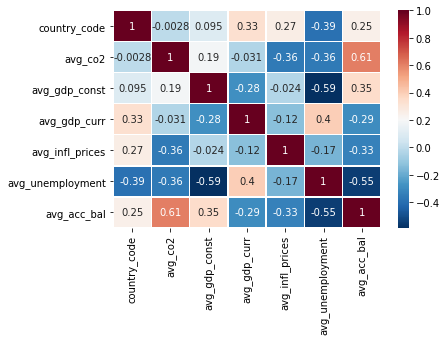

In [386]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)